In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from IPython.display import HTML
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=30

In [2]:
#dataset = tf.keras.preprocessing.image_datatset_from_directory(
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "original",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
class_names = dataset.class_names
class_names

Found 3256 files belonging to 4 classes.


['Benign', 'Early', 'Pre', 'Pro']

(32, 256, 256, 3)
[2 2 0 2 3 2 3 3 3 0 1 1 1 1 1 3 0 3 2 1 1 0 0 3 2 1 1 2 1 3 2 2]


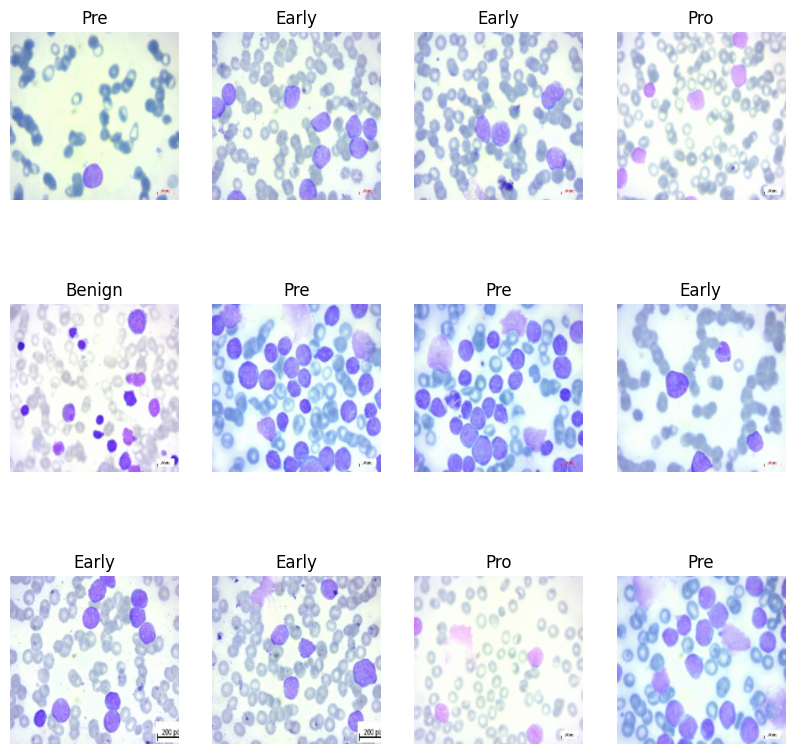

In [3]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [4]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [5]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [6]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import layers

# Define the image size and number of channels
IMAGE_SIZE = 256  # You can adjust this to your desired image size
CHANNELS = 3  # Set this to 3 for RGB images

# Define your class_names variable somewhere


# Create a preprocessing layer for resizing and rescaling
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255),
])

# Load pre-trained MobileNetV2 model without the top (classification) layers
base_model = MobileNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS), include_top=False, weights='imagenet')

# Freeze the base model's layers to prevent them from being updated during training
base_model.trainable = False

# Create a new model by adding layers on top of the base model
model1 = Sequential()
model1.add(resize_and_rescale)  # Add the preprocessing layer here
model1.add(base_model)
model1.add(GlobalAveragePooling2D())
model1.add(Dropout(0.2))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(len(class_names), activation='softmax'))  # Make sure you have defined 'class_names' somewhere

# Build the model
model1.build((None, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

# Compile the model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model1.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 4)                

In [11]:
from keras.utils import plot_model

plot_model(model1,to_file='model_mobilenetv2.png',show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [12]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from PIL import Image
import cv2
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.layers import LayerNormalization
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D
# from tensorflow.keras.layers import 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2  # Import regulasi L2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from 

SyntaxError: invalid non-printable character U+00A0 (2664924827.py, line 28)

In [10]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
history1 = model1.fit(train_ds, epochs=30, batch_size=BATCH_SIZE, validation_data=test_ds)
# Mengambil nilai akurasi pelatihan dan validasi serta loss pelatihan dari history
train_accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']

# Menampilkan nilai akurasi pelatihan dan validasi serta loss pelatihan
print("Training Accuracy:", train_accuracy[-1])
print("Validation Accuracy:", val_accuracy[-1])
print("Training Loss:", train_loss[-1])
print("Validation Loss:", val_loss[-1])

Epoch 1/30
81/81 [==============================] - 50s 571ms/step - loss: 0.3566 - accuracy: 0.8754 - val_loss: 0.1874 - val_accuracy: 0.9318
Epoch 2/30
81/81 [==============================] - 45s 549ms/step - loss: 0.1406 - accuracy: 0.9536 - val_loss: 0.2002 - val_accuracy: 0.9375
Epoch 3/30
81/81 [==============================] - 44s 545ms/step - loss: 0.1062 - accuracy: 0.9675 - val_loss: 0.0909 - val_accuracy: 0.9659
Epoch 4/30
81/81 [==============================] - 45s 552ms/step - loss: 0.0910 - accuracy: 0.9659 - val_loss: 0.1104 - val_accuracy: 0.9659
Epoch 5/30
81/81 [==============================] - 45s 549ms/step - loss: 0.0752 - accuracy: 0.9737 - val_loss: 0.0913 - val_accuracy: 0.9716
Epoch 6/30
81/81 [==============================] - 45s 550ms/step - loss: 0.0834 - accuracy: 0.9717 - val_loss: 0.0905 - val_accuracy: 0.9631
Epoch 7/30
81/81 [==============================] - 45s 553ms/step - loss: 0.0853 - accuracy: 0.9702 - val_loss: 0.0653 - val_accuracy: 0.9744

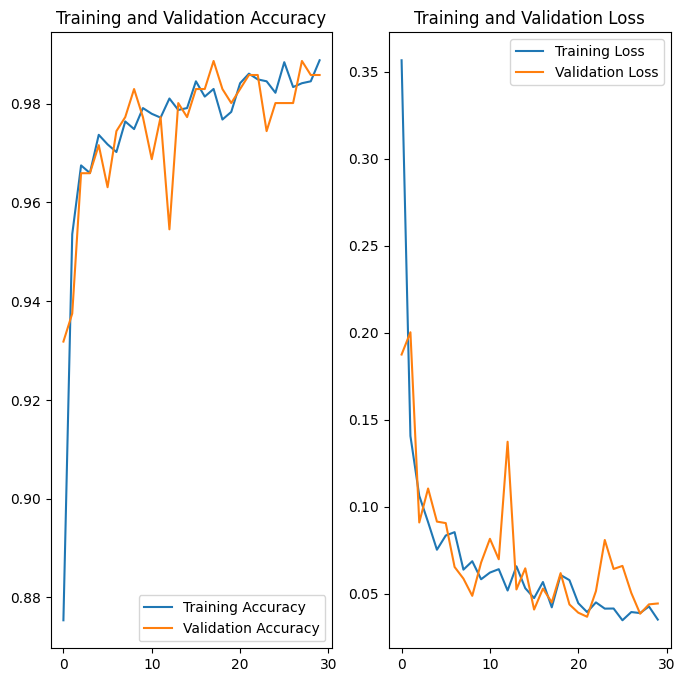

In [18]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(30), acc, label='Training Accuracy')
plt.plot(range(30), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(30), loss, label='Training Loss')
plt.plot(range(30), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Pre
1/1 [==============================] - 1s 1s/step
predicted label: Pre


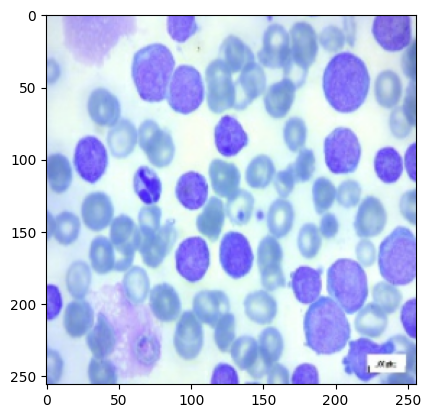

In [19]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model1.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [20]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model1.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 46ms/step


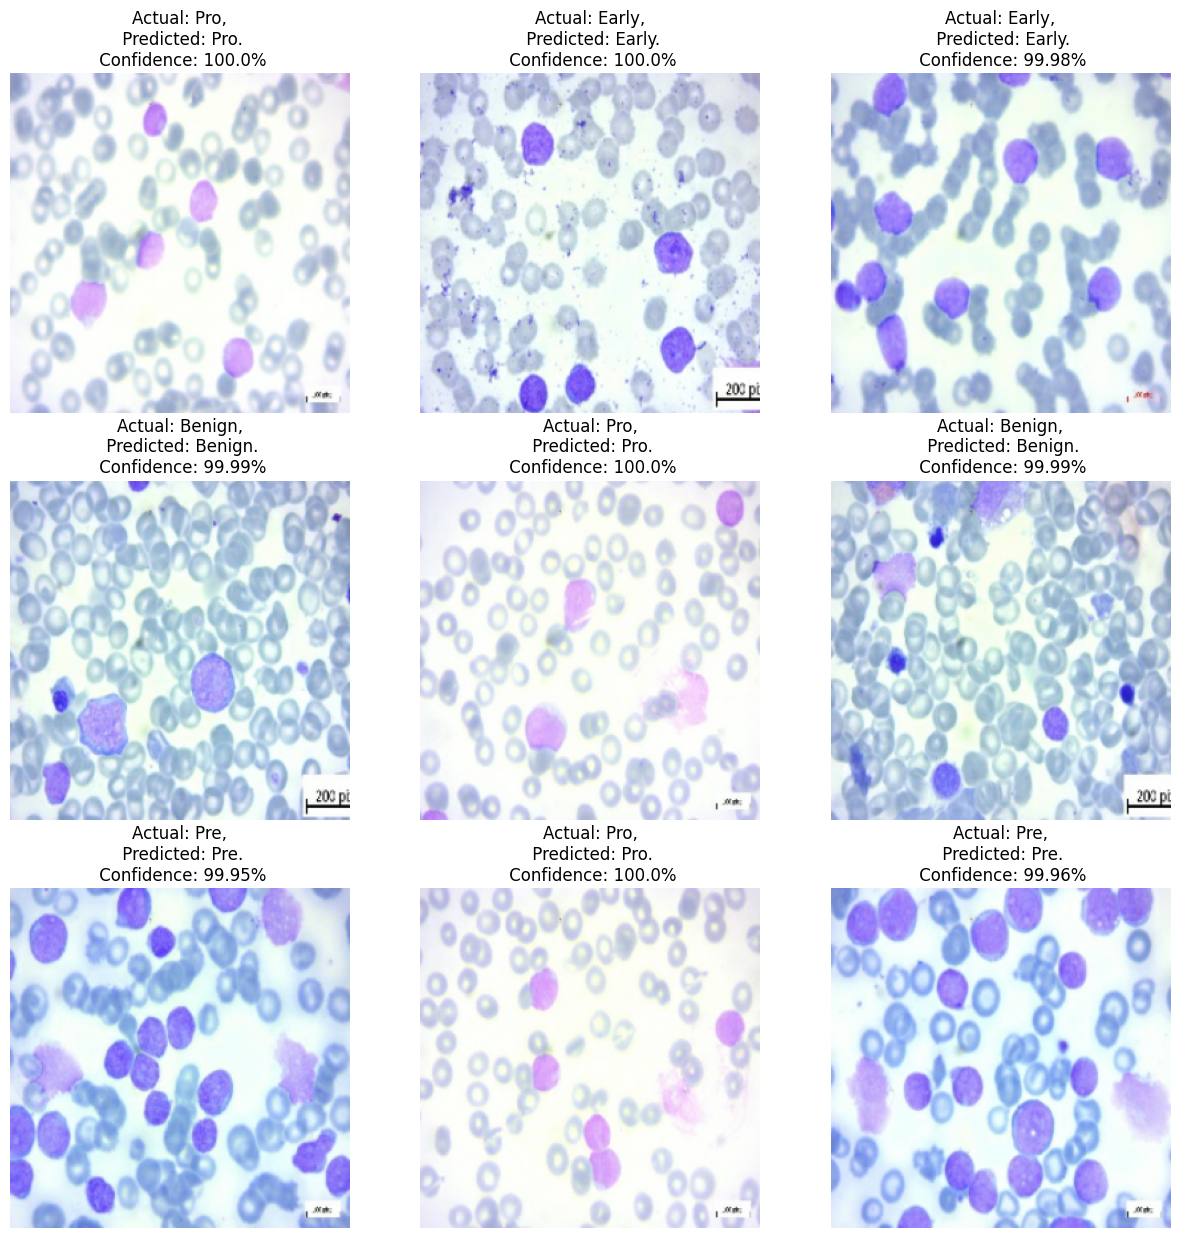

In [22]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model1, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

1/1 [==============================] - 0s 494ms/step
Precision: 0.9860
Recall: 0.9858
F1 Score: 0.9857


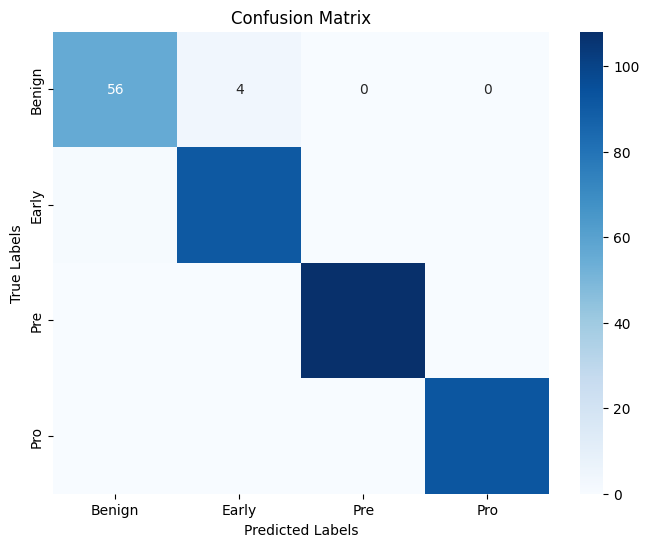

In [23]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test dataset and make predictions
for images_batch, labels_batch in test_ds:
    batch_predictions = model1.predict(images_batch)
    
    # Get the true labels
    true_labels.extend(labels_batch.numpy())
    
    # Get the predicted labels by selecting the class with the highest probability
    predicted_labels.extend(np.argmax(batch_predictions, axis=1))

# Calculate precision, recall, and F1 score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import layers

# Define the image size and number of channels
IMAGE_SIZE = 256  # You can adjust this to your desired image size
CHANNELS = 3  # Set this to 3 for RGB images

# Define your class_names variable somewhere

# Create a preprocessing layer for resizing and rescaling
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255),
])

# Load pre-trained MobileNetV2 model without the top (classification) layers
base_model = MobileNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS), include_top=False, weights='imagenet')

# Freeze the base model's layers to prevent them from being updated during training
base_model.trainable = False

# Create a new model by adding layers on top of the base model (changing the variable name to model2)
model2 = Sequential()
model2.add(resize_and_rescale)  # Add the preprocessing layer here
model2.add(base_model)
model2.add(GlobalAveragePooling2D())
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(len(class_names), activation='softmax'))  # Make sure you have defined 'class_names' somewhere

# Build the model
model2.build((None, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model2.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_4  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_4 (Dropout)         (None, 1280)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               163968    
                                                                 
 dense_9 (Dense)             (None, 4)               

In [27]:
history2 = model2.fit(train_ds, epochs=30, batch_size=BATCH_SIZE, validation_data=test_ds)
# Mengambil nilai akurasi pelatihan dan validasi serta loss pelatihan dari history
train_accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']

# Menampilkan nilai akurasi pelatihan dan validasi serta loss pelatihan
print("Training Accuracy:", train_accuracy[-1])
print("Validation Accuracy:", val_accuracy[-1])
print("Training Loss:", train_loss[-1])
print("Validation Loss:", val_loss[-1])

Epoch 1/30
81/81 [==============================] - 47s 554ms/step - loss: 0.3321 - accuracy: 0.8831 - val_loss: 0.1733 - val_accuracy: 0.9460
Epoch 2/30
81/81 [==============================] - 45s 553ms/step - loss: 0.1281 - accuracy: 0.9636 - val_loss: 0.0999 - val_accuracy: 0.9688
Epoch 3/30
81/81 [==============================] - 46s 566ms/step - loss: 0.1081 - accuracy: 0.9598 - val_loss: 0.2127 - val_accuracy: 0.9347
Epoch 4/30
81/81 [==============================] - 45s 549ms/step - loss: 0.0966 - accuracy: 0.9667 - val_loss: 0.1175 - val_accuracy: 0.9716
Epoch 5/30
81/81 [==============================] - 45s 554ms/step - loss: 0.0961 - accuracy: 0.9683 - val_loss: 0.1077 - val_accuracy: 0.9659
Epoch 6/30
81/81 [==============================] - 45s 551ms/step - loss: 0.0832 - accuracy: 0.9721 - val_loss: 0.1156 - val_accuracy: 0.9631
Epoch 7/30
81/81 [==============================] - 45s 551ms/step - loss: 0.0759 - accuracy: 0.9760 - val_loss: 0.0557 - val_accuracy: 0.9744

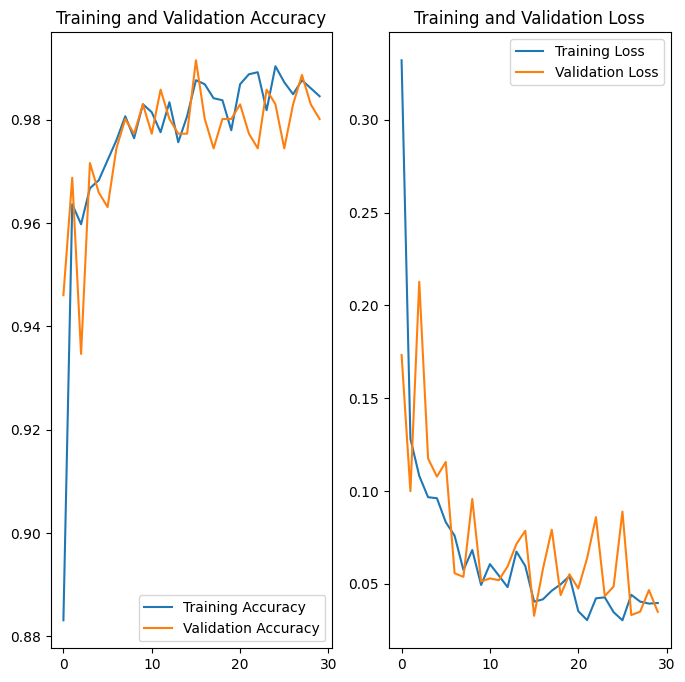

In [28]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(30), acc, label='Training Accuracy')
plt.plot(range(30), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(30), loss, label='Training Loss')
plt.plot(range(30), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 1s 514ms/step
Precision: 0.9808
Recall: 0.9801
F1 Score: 0.9801


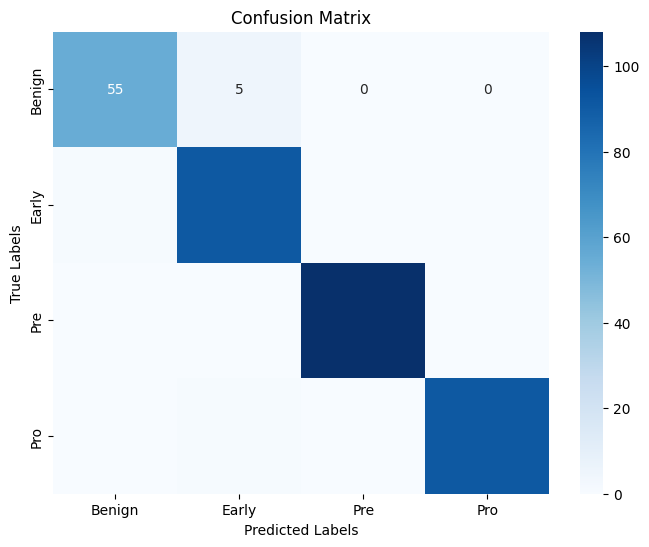

In [29]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test dataset and make predictions
for images_batch, labels_batch in test_ds:
    batch_predictions = model2.predict(images_batch)
    
    # Get the true labels
    true_labels.extend(labels_batch.numpy())
    
    # Get the predicted labels by selecting the class with the highest probability
    predicted_labels.extend(np.argmax(batch_predictions, axis=1))

# Calculate precision, recall, and F1 score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()